In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_hospital_data.csv")


In [2]:
df["department"].value_counts()


KeyError: 'department'

In [3]:
df.columns


Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date',
       'appointment_time', 'reason_for_visit', 'status', 'treatment_cost'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


In [5]:
df.columns


Index(['appointment_id', 'patient_id', 'doctor_id', 'appointment_date',
       'appointment_time', 'reason_for_visit', 'status', 'treatment_cost'],
      dtype='object')

In [6]:
df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appointment_id    200 non-null    object 
 1   patient_id        200 non-null    object 
 2   doctor_id         200 non-null    object 
 3   appointment_date  200 non-null    object 
 4   appointment_time  200 non-null    object 
 5   reason_for_visit  200 non-null    object 
 6   status            200 non-null    object 
 7   treatment_cost    200 non-null    float64
dtypes: float64(1), object(7)
memory usage: 12.6+ KB


In [7]:
df["treatment_cost"] = (
    df["treatment_cost"]
    .astype(str)
    .str.replace("[₹,]", "", regex=True)
    .astype(float)
)


In [8]:
df["treatment_cost"].describe()


count     200.000000
mean     2617.205000
std      1258.892679
min       523.000000
25%      1542.500000
50%      2657.000000
75%      3576.250000
max      4984.000000
Name: treatment_cost, dtype: float64

In [9]:
df['treatment_cost'].mean()

np.float64(2617.205)

In [10]:
df["reason_for_visit"].value_counts().head(10)


reason_for_visit
Checkup         45
Consultation    43
Therapy         42
Follow-up       41
Emergency       29
Name: count, dtype: int64

In [11]:
df.sort_values("treatment_cost", ascending=False)[
    ["appointment_id", "reason_for_visit", "treatment_cost"]
].head(10)


,appointment_id,reason_for_visit,treatment_cost
91,A092,Therapy,4984.0
94,A095,Therapy,4977.0
171,A172,Checkup,4930.0
137,A138,Follow-up,4902.0
155,A156,Therapy,4878.0
191,A192,Consultation,4859.0
196,A197,Emergency,4856.0
170,A171,Follow-up,4849.0
85,A086,Consultation,4824.0
45,A046,Consultation,4760.0


In [12]:
df["status"].value_counts()


status
No-show      52
Scheduled    51
Cancelled    51
Completed    46
Name: count, dtype: int64

In [13]:
df.groupby("status")["treatment_cost"].mean()


status
Cancelled    2787.607843
Completed    2590.630435
No-show      2709.807692
Scheduled    2376.352941
Name: treatment_cost, dtype: float64

In [14]:
df["appointment_date"] = pd.to_datetime(df["appointment_date"])

df["appointment_date"].value_counts().sort_index()


appointment_date
2023-01-01    2
2023-01-02    1
2023-01-03    1
2023-01-05    1
2023-01-06    1
             ..
2023-12-18    1
2023-12-20    1
2023-12-24    1
2023-12-26    2
2023-12-30    1
Name: count, Length: 158, dtype: int64

In [15]:
df["appointment_time"].value_counts().head(10)


appointment_time
15:00:00    9
11:00:00    9
15:30:00    9
15:15:00    8
17:15:00    8
14:30:00    8
13:30:00    7
8:30:00     7
12:30:00    7
13:15:00    7
Name: count, dtype: int64

In [16]:
df.groupby("reason_for_visit")["treatment_cost"] \
  .mean() \
  .sort_values(ascending=False) \
  .head(10)


reason_for_visit
Consultation    2746.325581
Therapy         2688.333333
Emergency       2673.724138
Follow-up       2658.780488
Checkup         2353.133333
Name: treatment_cost, dtype: float64

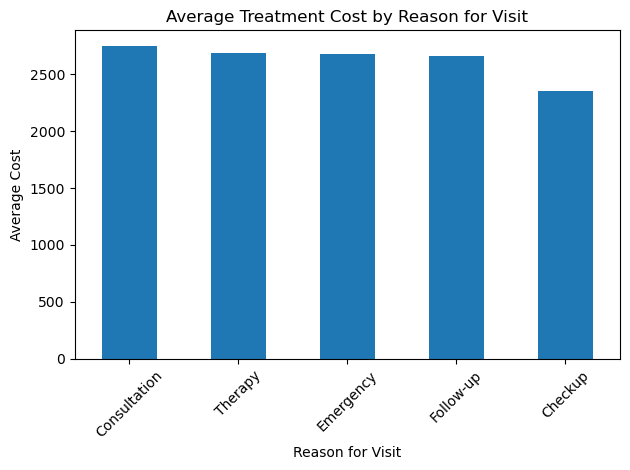

In [17]:
import matplotlib.pyplot as plt

top_reasons = (
    df.groupby("reason_for_visit")["treatment_cost"]
    .mean()
    .sort_values(ascending=False)
    .head(8)
)

plt.figure()
top_reasons.plot(kind="bar")
plt.title("Average Treatment Cost by Reason for Visit")
plt.xlabel("Reason for Visit")
plt.ylabel("Average Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/cleaned_hospital_appointments.csv")

df.shape
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB


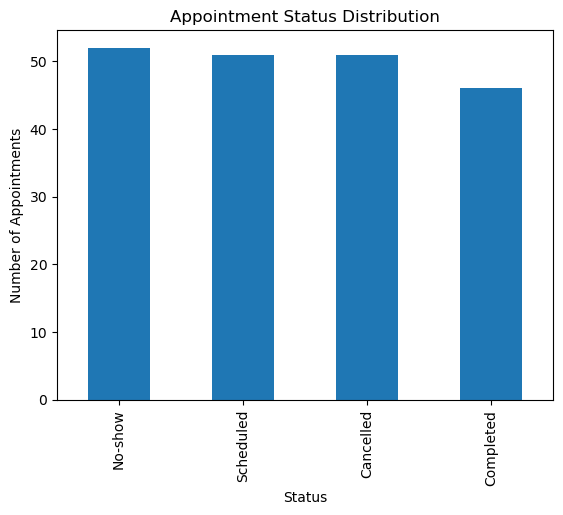

In [2]:
df["status"].value_counts().plot(kind="bar")
plt.title("Appointment Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Appointments")
plt.show()


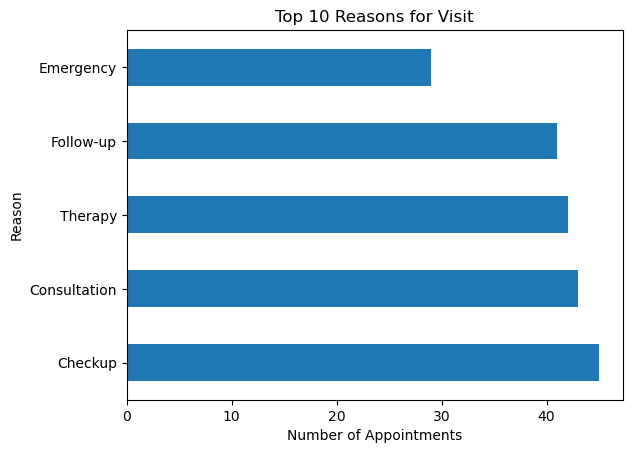

In [3]:
df["reason_for_visit"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 Reasons for Visit")
plt.xlabel("Number of Appointments")
plt.ylabel("Reason")
plt.show()


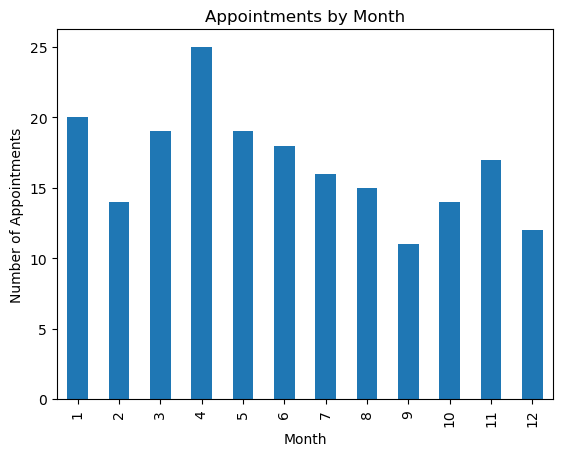

In [4]:
df["appointment_date"] = pd.to_datetime(df["appointment_date"])

df["appointment_date"].dt.month.value_counts().sort_index().plot(kind="bar")
plt.title("Appointments by Month")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")
plt.show()


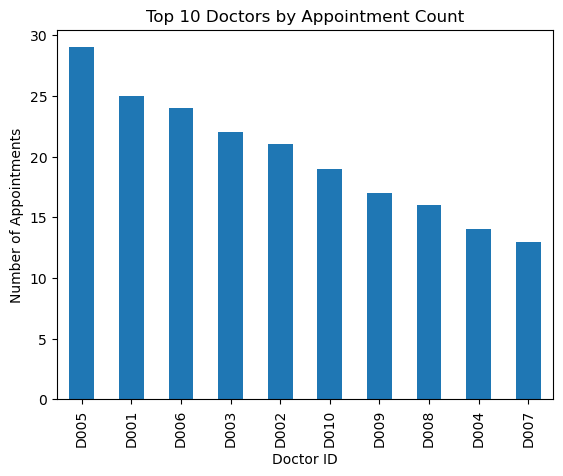

In [5]:
df["doctor_id"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Doctors by Appointment Count")
plt.xlabel("Doctor ID")
plt.ylabel("Number of Appointments")
plt.show()
